In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import matplotlib.pyplot as plt
import pyemma.plots as mplt 
import pyemma
import pickle as pkl
import sklearn as skl
import sklearn.metrics as mtr
import scipy as sc
import sys
from tqdm import tqdm

In [2]:
def combine_gini(g, nc, ml, npc, nan=0.66):
    out = []
    for i in range(len(nc)):
        for j in range(len(ml)):
            for k in range(len(npc)):
                curr = g[k][i,j]
                out.append( [ nc[i], ml[j], npc[k], np.nanmean(curr) ] )
    out = np.array(out)
    out[:,3][np.isnan(out[:,3])] = nan
    return out

In [3]:
n_clus = np.array([20, 30, 50, 70, 100, 150, 250, 350, 500, 700, 1000, 1500])
msm_lags = np.arange(5,50+1,5)
n_pcca = np.array([3, 4, 5, 6])

In [4]:
gdirect = [np.load(f'direct/saved_msm/ginis_{i}.npy') for i in n_pcca]
gsupervised = [np.load(f'supervised/saved_msm/ginis_{i}.npy') for i in n_pcca]
gurf2 = [np.load(f'urf/saved_h2_msm/ginis_{i}.npy') for i in n_pcca]
gurf3 = [np.load(f'urf/saved_h3_msm/ginis_{i}.npy') for i in n_pcca]

In [5]:
gdirect = combine_gini(gdirect, n_clus, msm_lags, n_pcca)

/tmp/ipykernel_1809143/887343993.py:7: RuntimeWarning: Mean of empty slice
  out.append( [ nc[i], ml[j], npc[k], np.nanmean(curr) ] )


In [6]:
gsupervised = [
    combine_gini( [gsupervised[i][j] for i in range(len(n_pcca))], n_clus, msm_lags, n_pcca )
for j in range(5)]
gsupervised = np.mean(gsupervised, axis=0)

/tmp/ipykernel_1809143/887343993.py:7: RuntimeWarning: Mean of empty slice
  out.append( [ nc[i], ml[j], npc[k], np.nanmean(curr) ] )


In [7]:
gurf2 = [
    combine_gini( [gurf2[i][j] for i in range(len(n_pcca))], n_clus, msm_lags, n_pcca )
for j in range(5)]
gurf2 = np.mean(gurf2, axis=0)

/tmp/ipykernel_1809143/887343993.py:7: RuntimeWarning: Mean of empty slice
  out.append( [ nc[i], ml[j], npc[k], np.nanmean(curr) ] )


In [8]:
gurf3 = [
    combine_gini( [gurf3[i][j] for i in range(len(n_pcca))], n_clus, msm_lags, n_pcca )
for j in range(5)]
gurf3 = np.mean(gurf3, axis=0)

/tmp/ipykernel_1809143/887343993.py:7: RuntimeWarning: Mean of empty slice
  out.append( [ nc[i], ml[j], npc[k], np.nanmean(curr) ] )


In [9]:
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=7
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=7
plt.rcParams['ytick.major.width']=2

In [10]:
diff_ = cp.deepcopy(gdirect)
diff_[:,3] = gurf2[:,3] - gdirect[:,3]

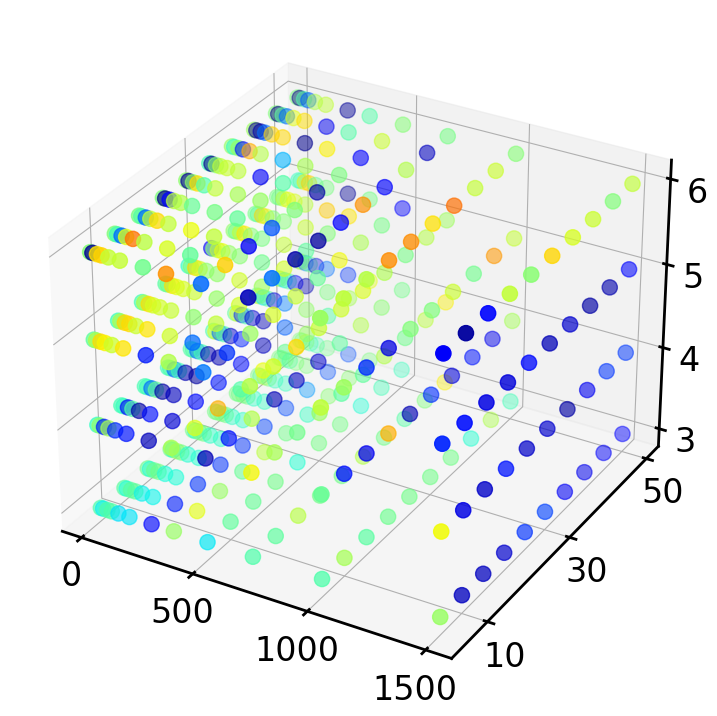

In [13]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(diff_[:,0], diff_[:,1], diff_[:,2], 
           marker='o', c=diff_[:,3], cmap='jet', vmin=-0.5, vmax=0.5, s=120)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,30,50])
ax.set_zticks([3,4,5,6])
plt.savefig('plots/gini_urf2_direct.pdf')
plt.show()

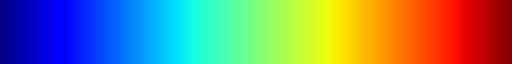

In [72]:
mt.cm.get_cmap('jet')

In [16]:
diff_ = cp.deepcopy(gurf2)
diff_[:,3] = gurf2[:,3] - gsupervised[:,3]

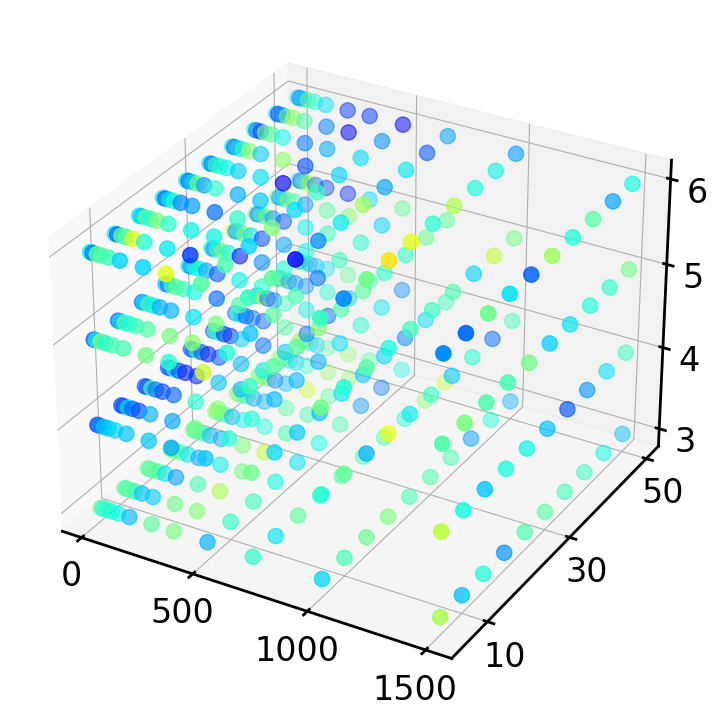

In [17]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(diff_[:,0], diff_[:,1], diff_[:,2], 
           marker='o', c=diff_[:,3], cmap='jet', vmin=-0.5, vmax=0.5, s=120)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,30,50])
ax.set_zticks([3,4,5,6])
plt.savefig('plots/gini_urf2_supervised.pdf')
plt.show()

In [18]:
diff_ = cp.deepcopy(gurf2)
diff_[:,3] = gsupervised[:,3] - gdirect[:,3]

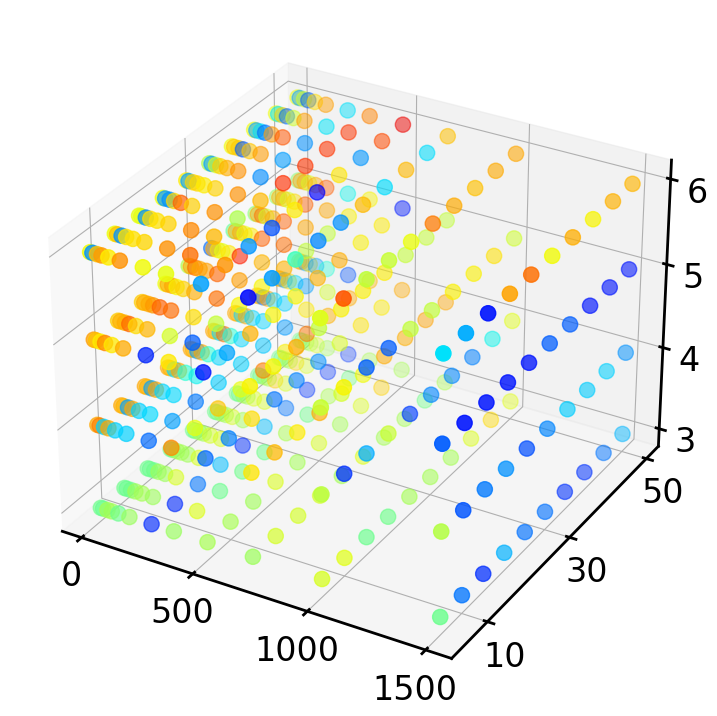

In [19]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(diff_[:,0], diff_[:,1], diff_[:,2], 
           marker='o', c=diff_[:,3], cmap='jet', vmin=-0.5, vmax=0.5, s=120)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,30,50])
ax.set_zticks([3,4,5,6])
plt.savefig('plots/gini_supervised_direct.pdf')
plt.show()

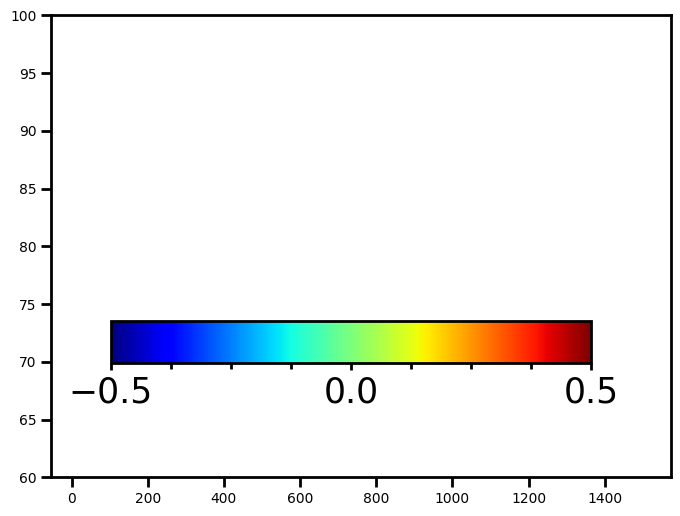

In [27]:
fig,ax = plt.subplots(1,figsize=(8,6))
cax = fig.add_axes([0.2,0.3,0.6,0.07])
pl=ax.scatter(diff_[:,0], diff_[:,1],
           marker='o', c=diff_[:,3], cmap='jet', vmin=-0.5, vmax=0.5,)
ax.set_ylim(60,100)
cb=plt.colorbar(pl, cax=cax, orientation='horizontal')
cb.ax.set_xticks([-0.5,0,0.5,])
cb.ax.tick_params(length=5, width=2, labelsize=25)
cb.ax.xaxis.set_minor_locator(AutoMinorLocator(4))
cb.ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/gini_colorbar.pdf')
plt.show()

In [9]:
gurf2 = gurf2[:,3]

In [10]:
gurf3 = gurf3[:,3]

In [11]:
gdirect = gdirect[:,3]

In [12]:
gsupervised = gsupervised[:,3]

In [57]:
bins = np.arange(0,1,0.02)

In [58]:
hurf2 = np.histogram(gurf2, bins=bins)[0]

In [59]:
hurf3 = np.histogram(gurf3, bins=bins)[0]

In [60]:
hsupervised = np.histogram(gsupervised, bins=bins)[0]

In [61]:
hdirect = np.histogram(gdirect, bins=bins)[0]

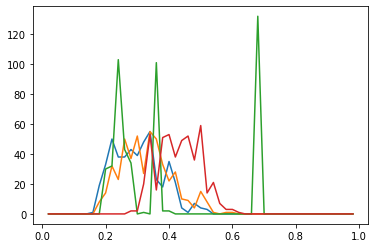

In [62]:
plt.plot(bins[1:], hurf2)
plt.plot(bins[1:], hurf3)
plt.plot(bins[1:], hdirect)
plt.plot(bins[1:], hsupervised)

In [64]:
data = [gdirect, gsupervised, gurf2]
colors = ['teal', 'dodgerblue', 'crimson']

In [69]:
means = np.mean(data, axis=1)
means

array([0.37559281, 0.42143013, 0.29271732])

In [48]:
extremes = np.min(data, axis=1), np.max(data, axis=1)
extremes

(array([0.18570006, 0.27349104, 0.14682963]),
 array([0.66      , 0.60081591, 0.50519405]))

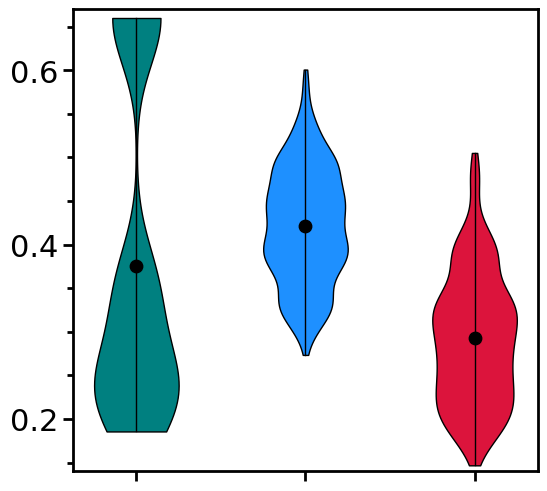

In [75]:
fig,ax=plt.subplots(1,figsize=(6,6))

for i in range(len(data)):
    parts=ax.violinplot([data[i]], positions=[i], showextrema=False)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    ax.plot([i,i], [extremes[0][i], extremes[1][i]], lw=1, color='black')
    ax.scatter([i], [means[i]], c='black', s=80)

ax.spines[:].set_linewidth(2)
ax.set_ylim(0.14,0.67)
ax.set_yticks([0.2,0.4,0.6])
ax.set_xticks([0,1,2])
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(labelsize=22, length=7, width=2, labelbottom=False)
ax.tick_params(which='minor', length=4, width=2)
#
plt.savefig('plots/gini_all.pdf')
plt.show()

In [79]:
np.where(gurf2<0.18)[0].shape

(20,)

In [77]:
np.where(gdirect<0.18)[0].shape

(0,)

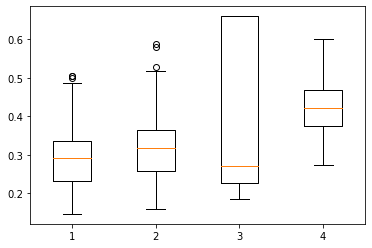

In [67]:
plt.boxplot([gurf2, gurf3, gdirect, gsupervised])
plt.show()